In [1]:
from IPython.core.display import HTML
css = open('notebook_css/style-table.css').read() + open('notebook_css/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

# Chapter #05

## Gradient Descent Learning with multiple inputs

In [2]:
## page-99

def weighted_sum(a, b):
    assert len(a) == len(b)
    output_ = 0
    for x, y in zip(a, b):
        output_ += x * y
    return output_

weights = [0.1, 0.2, -0.1]

def neural_network(input_, weights):
    pred = weighted_sum(input_, weights)
    return pred


In [3]:
toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]
win_or_lose_binary = [1, 1, 0, 1]

In [6]:
truth = win_or_lose_binary[0]
input_ = [toes[0], wlrec[0], nfans[0]]

pred = neural_network(input_, weights)
error = (pred - truth) ** 2
delta = pred - truth

In [8]:
def elementwise_mul(scalar, vector):
    output_ = []
    for x in vector:
        output_.append(scalar * x)
    return output_

weights_delta = elementwise_mul(delta, input_)

In [10]:
assert len(weights) == len(weights_delta)
weights, weights_delta

([0.1, 0.2, -0.1],
 [-1.189999999999999, -0.09099999999999994, -0.16799999999999987])

In [12]:
alpha = 0.01
for i, d in enumerate(weights_delta):
    weights[i] -= alpha * d
weights

[0.1119, 0.20091, -0.09832]

# Chapter #06

In [51]:
## page-126

import numpy as np

## Step-1: get the data

streetlights = np.array([[1,0,1],
                         [0,1,1],
                         [0,0,1],
                         [1,1,1],
                         [0,1,1],
                         [1,0,1],
                        ])
walk_vs_stop = np.array([0,1,0,1,1,0])

assert len(streetlights) == len(walk_vs_stop)

## Step-2: Create the network
alpha = 0.1
weights = np.array([0.5, 0.48, -0.7])
assert len(weights) == len(streetlights[0])

## Train on a single data point

input_ = streetlights[0]
goal_pred = walk_vs_stop[0]

num_iters = 20
for i in range(num_iters):
    pred = np.dot(input_, weights)
    error = (goal_pred - pred) ** 2
    delta = pred - goal_pred
    weights_delta = input_ * delta
    weights -= alpha * weights_delta
    print(f"Iter [{i:2}]: Error = {error:.10f}\t | Weights = {weights}")

Iter [ 0]: Error = 0.0400000000	 | Weights = [ 0.52  0.48 -0.68]
Iter [ 1]: Error = 0.0256000000	 | Weights = [ 0.536  0.48  -0.664]
Iter [ 2]: Error = 0.0163840000	 | Weights = [ 0.5488  0.48   -0.6512]
Iter [ 3]: Error = 0.0104857600	 | Weights = [ 0.55904  0.48    -0.64096]
Iter [ 4]: Error = 0.0067108864	 | Weights = [ 0.567232  0.48     -0.632768]
Iter [ 5]: Error = 0.0042949673	 | Weights = [ 0.5737856  0.48      -0.6262144]
Iter [ 6]: Error = 0.0027487791	 | Weights = [ 0.57902848  0.48       -0.62097152]
Iter [ 7]: Error = 0.0017592186	 | Weights = [ 0.58322278  0.48       -0.61677722]
Iter [ 8]: Error = 0.0011258999	 | Weights = [ 0.58657823  0.48       -0.61342177]
Iter [ 9]: Error = 0.0007205759	 | Weights = [ 0.58926258  0.48       -0.61073742]
Iter [10]: Error = 0.0004611686	 | Weights = [ 0.59141007  0.48       -0.60858993]
Iter [11]: Error = 0.0002951479	 | Weights = [ 0.59312805  0.48       -0.60687195]
Iter [12]: Error = 0.0001888947	 | Weights = [ 0.59450244  0.48    

In [52]:
## page-127

import numpy as np

## Step-1: get the data

streetlights = np.array([[1,0,1],
                         [0,1,1],
                         [0,0,1],
                         [1,1,1],
                         [0,1,1],
                         [1,0,1],
                        ])
walk_vs_stop = np.array([0,1,0,1,1,0])

assert len(streetlights) == len(walk_vs_stop)

## Step-2: Create the network
alpha = 0.1
weights = np.array([0.5, 0.48, -0.7])
assert len(weights) == len(streetlights[0])

## Train on the whole dataset

num_iters = 40
for i in range(num_iters):
    iter_error = 0.
    for input_, goal_pred in zip(streetlights, walk_vs_stop):
        pred = np.dot(input_, weights)
        error = (goal_pred - pred) ** 2
        iter_error += error
        delta = pred - goal_pred
        weights_delta = input_ * delta
        weights -= alpha * weights_delta
    print(f"Iter [{i:2}]: Error = {iter_error:.10f}\t | Weights = {weights}")

Iter [ 0]: Error = 2.6561231104	 | Weights = [ 0.540848  0.72112  -0.400432]
Iter [ 1]: Error = 0.9628701777	 | Weights = [ 0.49944225  0.84194128 -0.28583891]
Iter [ 2]: Error = 0.5509165867	 | Weights = [ 0.43945363  0.91252555 -0.23598163]
Iter [ 3]: Error = 0.3644583685	 | Weights = [ 0.38100946  0.95888996 -0.20924067]
Iter [ 4]: Error = 0.2516768662	 | Weights = [ 0.32955689  0.99146612 -0.19117291]
Iter [ 5]: Error = 0.1779757505	 | Weights = [ 0.28576471  1.01500784 -0.17673288]
Iter [ 6]: Error = 0.1286446073	 | Weights = [ 0.24888702  1.03207349 -0.16412797]
Iter [ 7]: Error = 0.0951103695	 | Weights = [ 0.21787885  1.0442761  -0.15269426]
Iter [ 8]: Error = 0.0719456425	 | Weights = [ 0.19174429  1.05275286 -0.14216186]
Iter [ 9]: Error = 0.0556491499	 | Weights = [ 0.16962672  1.05835728 -0.1324006 ]
Iter [10]: Error = 0.0439476394	 | Weights = [ 0.15081598  1.0617496  -0.12333176]
Iter [11]: Error = 0.0353579671	 | Weights = [ 0.13473149  1.06344721 -0.11489715]
Iter [12]:

In [55]:
## page-144

import numpy as np

np.random.seed(217)

def relu(x):
    return (x>0)*x

alpha = 0.1
hidden_size = 4

##data
streetlights = np.array([[1,0,1],
                         [0,1,1],
                         [0,0,1],
                         [1,1,1],
                        ])

walk_vs_stop = np.array([[1,1,0,0]]).T

# walk_vs_stop.shape, streetlights.shape

## NN weights
##
weights_0_1 = 2 * np.random.random(size=(3, hidden_size)) - 1
weights_1_2 = 2 * np.random.random(size=(hidden_size, 1)) - 1

## training for a single data point
##
layer_0 = streetlights[0]
layer_1 = relu(np.dot(layer_0, weights_0_1))
layer_2 = np.dot(layer_1, weights_1_2)


Iter [ 0]: Error = 1.7808028748
Iter [10]: Error = 1.3347877684
Iter [20]: Error = 1.2035819447
Iter [30]: Error = 1.1061957805
Iter [40]: Error = 0.9719670651
Iter [50]: Error = 0.7905809315
Iter [60]: Error = 0.5953929383
Iter [70]: Error = 0.3298613108
Iter [80]: Error = 0.0999647575
Iter [90]: Error = 0.0124700951
Iter [100]: Error = 0.0007677983
Iter [110]: Error = 0.0000381710
Iter [120]: Error = 0.0000018294
Iter [130]: Error = 0.0000000514
Iter [140]: Error = 0.0000000015


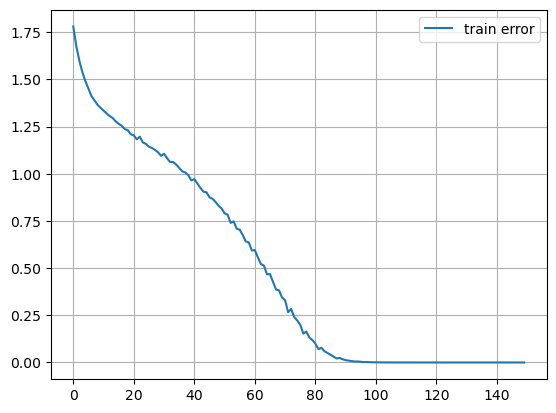

In [152]:
## page 145

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(217)

###############################################################
## data

streetlights = np.array([[1,0,1],
                         [0,1,1],
                         [0,0,1],
                         [1,1,1],
                        ])

walk_vs_stop = np.array([[1,1,0,0]]).T

###############################################################

def relu(x):
    return (x > 0) * x

def relu_to_deriv(output):
    return output > 0

###############################################################

alpha = 0.1
hidden_size = 4

weights_0_1 = 2 * np.random.random(size=(3, hidden_size)) - 1
weights_1_2 = 2 * np.random.random(size=(hidden_size, hidden_size)) - 1
weights_2_3 = 2 * np.random.random(size=(hidden_size, 1)) - 1

###############################################################
num_iters = 150
error_list = []
for iter_ in range(num_iters):
    iter_error = 0
    for i in range(len(streetlights)):
        input_ = streetlights[i:i+1]
        label_ = walk_vs_stop[i:i+1]
        
        layer_0 = input_
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        layer_2 = relu(np.dot(layer_1, weights_1_2))
        layer_3 = np.dot(layer_2, weights_2_3)
        final_layer = layer_3
        
        error = np.sum((label_ - final_layer) ** 2)
        iter_error += error
        
        layer_3_delta = label_ - final_layer
        layer_2_delta = np.dot(layer_3_delta, weights_2_3.T) * relu_to_deriv(layer_2)
        layer_1_delta = np.dot(layer_2_delta, weights_1_2.T) * relu_to_deriv(layer_1)
        
        weights_2_3 += alpha * np.dot(layer_2.T, layer_3_delta)
        weights_1_2 += alpha * np.dot(layer_1.T, layer_2_delta)
        weights_0_1 += alpha * np.dot(layer_0.T, layer_1_delta)
    error_list.append(iter_error)
    if iter_ % 10 == 0:
        print(f"Iter [{iter_:2}]: Error = {iter_error:.10f}")

plt.figure()
plt.plot(list(range(num_iters)), error_list, label="train error")
plt.legend(); plt.grid(); plt.show()
        
        

In [119]:
layer_1.T.shape, layer_2_delta.shape

((4, 1), (1, 1))

In [120]:
layer_0.T.shape, layer_1_delta.shape

((3, 1), (1, 4))

In [121]:
weights_0_1.shape, weights_1_2.shape

((3, 4), (4, 1))

In [122]:
input_.shape

(1, 3)

In [123]:
input_

array([[1, 1, 1]])

In [124]:
streetlights[0].shape

(3,)

In [125]:
label.shape

(1,)

In [126]:
walk_vs_stop[0:1].shape

(1, 1)

In [127]:
error

0.042562000854258104

In [128]:
layer_2

array([[0.2063056]])

In [129]:
layer_1_delta

array([[-0.        ,  0.23299372,  0.        , -0.15249223]])

In [130]:
layer_1_delta.shape

(1, 4)

In [131]:
layer_2_delta

array([[-0.2063056]])

In [132]:
layer_2_delta.shape

(1, 1)

In [133]:
relu_to_deriv(layer_1)

array([[False,  True, False,  True]])

In [134]:
np.dot(layer_2_delta, weights_1_2.T)

array([[-0.10625614,  0.23600759,  0.03631028, -0.14669938]])

In [135]:
d

array([[ 0.        ],
       [-0.01460877],
       [ 0.        ],
       [-0.028079  ]])

In [136]:
weights_1_2

array([[ 0.51504246],
       [-1.14397083],
       [-0.1760024 ],
       [ 0.71107803]])

In [137]:
len(walk_vs_stop)

4

In [108]:
len(streetlights)

4

# Chapter #08

In [162]:
## page-164
## three-layer NN on MNIST dataset

import sys
import numpy as np
from keras.datasets import mnist

In [163]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

11501568/11490434 [==============================] - 1s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [164]:
x_train.dtype

dtype('uint8')

In [165]:
type(x_train)

numpy.ndarray

In [196]:
train_images = x_train[:1000].reshape(-1, 28*28) / 255
train_labels = y_train[:1000]

train_images.shape, train_labels.shape

((1000, 784), (1000,))

In [197]:
test_images = x_test[:1000].reshape(-1, 28*28) / 255
test_labels = y_test[:1000]

test_images.shape, test_labels.shape

((1000, 784), (1000,))

In [198]:
train_labels_1hot = np.zeros(shape=(len(train_labels), 10))
for i, x in enumerate(train_labels):
    train_labels_1hot[i, x] = 1

assert len(train_labels) == len(train_labels_1hot)

In [199]:
test_labels_1hot = np.zeros(shape=(len(test_labels), 10))
for i, x in enumerate(test_labels):
    test_labels_1hot[i, x] = 1

assert len(test_labels) == len(test_labels_1hot)

In [201]:
train_labels_1hot.shape, test_labels_1hot.shape

((1000, 10), (1000, 10))

In [202]:
train_labels_1hot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [203]:
test_labels_1hot[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [204]:
train_images[0].shape, test_images[0].shape

((784,), (784,))

In [181]:
np.random.seed(217)

In [182]:
relu = lambda x: (x>0)*x
relu_to_deriv = lambda x: x >= 0

alpha = 0.005
num_iters = 350
hidden_size = 40
pixels_per_img = 784
num_labels = 10

In [194]:
weights_0_1 = 0.2 * np.random.random(size=(pixels_per_img, hidden_size)) - 0.1
weights_1_2 = 0.2 * np.random.random(size=(hidden_size, num_labels)) - 0.1

Iter [  0] | Error = 715.9550459073 | Accuracy = 53.9000%
Iter [ 10] | Error = 292.0759468641 | Accuracy = 90.5000%
Iter [ 20] | Error = 249.3485302726 | Accuracy = 92.8000%
Iter [ 30] | Error = 228.7682784650 | Accuracy = 93.9000%
Iter [ 40] | Error = 214.1572566199 | Accuracy = 95.4000%
Iter [ 50] | Error = 202.7266069238 | Accuracy = 96.6000%
Iter [ 60] | Error = 193.2989290863 | Accuracy = 97.1000%
Iter [ 70] | Error = 185.5183819707 | Accuracy = 97.6000%
Iter [ 80] | Error = 179.0787681172 | Accuracy = 98.1000%
Iter [ 90] | Error = 173.1846001806 | Accuracy = 98.1000%
Iter [100] | Error = 167.7714734005 | Accuracy = 98.3000%
Iter [110] | Error = 162.6296898946 | Accuracy = 98.7000%
Iter [120] | Error = 157.8634092267 | Accuracy = 98.8000%
Iter [130] | Error = 153.4278399544 | Accuracy = 99.1000%
Iter [140] | Error = 149.3244910007 | Accuracy = 99.2000%
Iter [150] | Error = 145.7372877859 | Accuracy = 99.4000%
Iter [160] | Error = 142.5372591707 | Accuracy = 99.6000%
Iter [170] | E

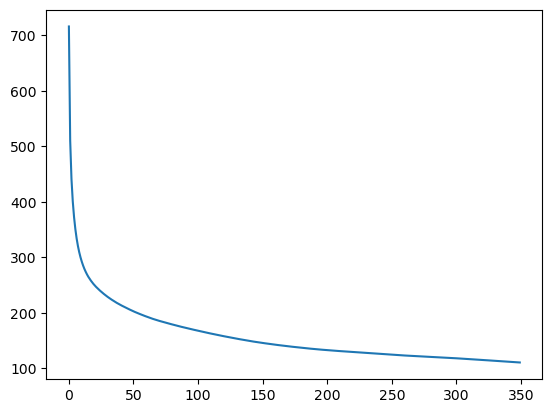

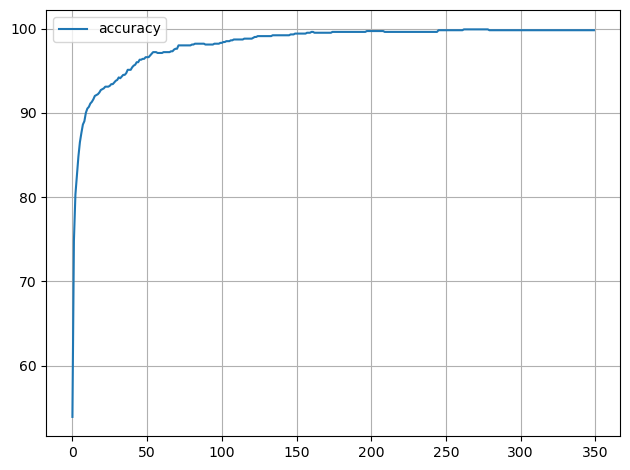

In [195]:
error_list = []
accuracy_list = []

for iter_ in range(num_iters):
    iter_error = 0.0
    iter_correct_count = 0
    for i in range(len(train_images)):
        input_ = train_images[i:i+1]
        label_ = train_labels_1hot[i:i+1]
        
        layer_0 = input_
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        layer_2 = np.dot(layer_1, weights_1_2)
        
        error = np.sum((label_ - layer_2) ** 2)
        iter_error += error
        iter_correct_count += int(np.argmax(layer_2) == np.argmax(label_))
        
        layer_2_delta = label_ - layer_2
        layer_1_delta = np.dot(layer_2_delta, weights_1_2.T) * relu_to_deriv(layer_1)
        
        weights_1_2 += alpha * np.dot(layer_1.T, layer_2_delta)
        weights_0_1 += alpha * np.dot(layer_0.T, layer_1_delta)
    
    error_list.append(iter_error)
    iter_accuracy = 100 * iter_correct_count / len(train_images)
    accuracy_list.append(iter_accuracy)
    
    if iter_ % 10 == 0:
        print(f"Iter [{iter_:3}] | Error = {iter_error:.10f} | Accuracy = {iter_accuracy:3.4f}%")
        
plt.figure()
plt.plot(list(range(num_iters)), error_list, label="error")
plt.legend(); plt.grid(); plt.tight_layout(); plt.show()
plt.figure()
plt.plot(list(range(num_iters)), accuracy_list, label="accuracy")
plt.legend(); plt.grid(); plt.tight_layout(); plt.show()

In [208]:
## test phase

test_accuracy_count = 0.0

for i in range(len(test_images)):
    input_ = test_images[i:i+1]
    label_ = test_labels_1hot[i:i+1]

    layer_0 = input_
    layer_1 = relu(np.dot(layer_0, weights_0_1))
    layer_2 = np.dot(layer_1, weights_1_2)
    
    pred = layer_2
    test_accuracy_count += np.argmax(label_) == np.argmax(pred)

test_accuracy = 100 * test_accuracy_count / len(test_images)
print(f"Test Accuracy = {test_accuracy:5.2f} %")


Test Accuracy = 66.30 %


Iter [  0] | Error = 0.7311013093 | Accuracy = 51.1000%
Iter [ 10] | Error = 0.2834452419 | Accuracy = 90.8000%
Iter [ 20] | Error = 0.2356158251 | Accuracy = 94.3000%
Iter [ 30] | Error = 0.2144662231 | Accuracy = 95.9000%
Iter [ 40] | Error = 0.2016638888 | Accuracy = 96.3000%
Iter [ 50] | Error = 0.1923243655 | Accuracy = 97.1000%
Iter [ 60] | Error = 0.1846170633 | Accuracy = 97.3000%
Iter [ 70] | Error = 0.1783093302 | Accuracy = 97.8000%
Iter [ 80] | Error = 0.1732544349 | Accuracy = 98.1000%
Iter [ 90] | Error = 0.1691585708 | Accuracy = 98.4000%
Iter [100] | Error = 0.1656124693 | Accuracy = 98.6000%
Iter [110] | Error = 0.1626106697 | Accuracy = 98.6000%
Iter [120] | Error = 0.1595655312 | Accuracy = 98.6000%
Iter [130] | Error = 0.1566619381 | Accuracy = 98.7000%
Iter [140] | Error = 0.1537847107 | Accuracy = 98.7000%
Iter [150] | Error = 0.1509159067 | Accuracy = 99.0000%
Iter [160] | Error = 0.1480729453 | Accuracy = 98.9000%
Iter [170] | Error = 0.1453867887 | Accuracy = 9

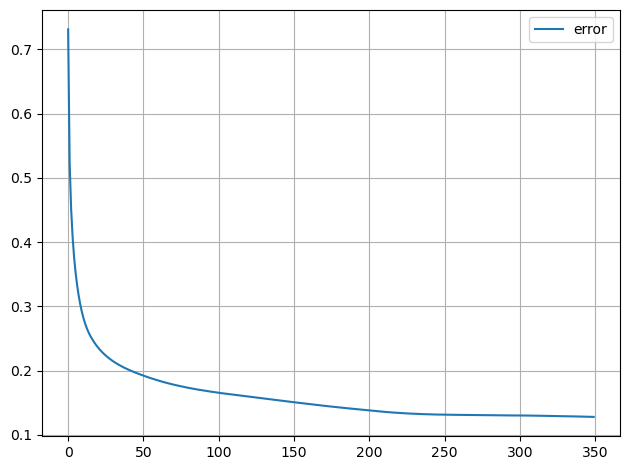

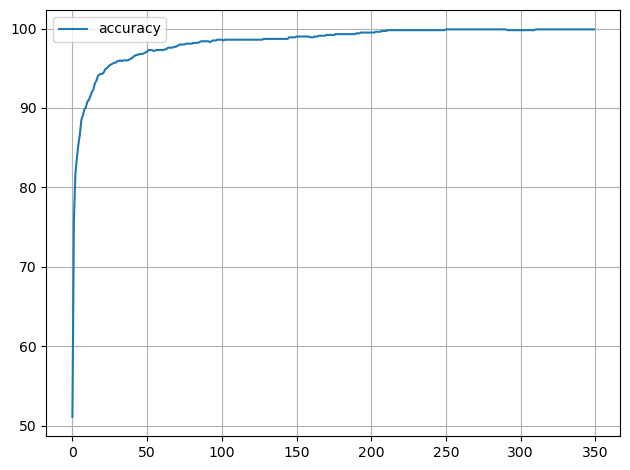

In [222]:
## Overall training Script
##

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train.shape, y_train.shape, x_test.shape, y_test.shape

train_images = x_train[:1000].reshape(-1, 28*28) / 255
train_labels = y_train[:1000]
# train_images.shape, train_labels.shape

train_labels_1hot = np.zeros(shape=(len(train_labels), 10))
for i, x in enumerate(train_labels):
    train_labels_1hot[i, x] = 1

assert len(train_labels) == len(train_labels_1hot)

relu = lambda x: (x>0)*x
relu_to_deriv = lambda x: x >= 0

alpha = 0.005
num_iters = 350
hidden_size = 40
pixels_per_img = 784
num_labels = 10

weights_0_1 = 0.2 * np.random.random(size=(pixels_per_img, hidden_size)) - 0.1
weights_1_2 = 0.2 * np.random.random(size=(hidden_size, num_labels)) - 0.1

error_list = []
accuracy_list = []

for iter_ in range(num_iters):
    iter_error = 0.0
    iter_correct_count = 0
    for i in range(len(train_images)):
        input_ = train_images[i:i+1]
        label_ = train_labels_1hot[i:i+1]
        
        layer_0 = input_
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        layer_2 = np.dot(layer_1, weights_1_2)
        
        error = np.sum((label_ - layer_2) ** 2)
        iter_error += error
        iter_correct_count += int(np.argmax(layer_2) == np.argmax(label_))
        
        layer_2_delta = label_ - layer_2
        layer_1_delta = np.dot(layer_2_delta, weights_1_2.T) * relu_to_deriv(layer_1)
        
        weights_1_2 += alpha * np.dot(layer_1.T, layer_2_delta)
        weights_0_1 += alpha * np.dot(layer_0.T, layer_1_delta)
    
    iter_error /= len(train_images)
    error_list.append(iter_error)
    iter_accuracy = 100 * iter_correct_count / len(train_images)
    accuracy_list.append(iter_accuracy)
    
    if iter_ % 10 == 0:
        print(f"Iter [{iter_:3}] | Error = {iter_error:.10f} | Accuracy = {iter_accuracy:3.4f}%")
        
plt.figure()
plt.plot(list(range(num_iters)), error_list, label="error")
plt.legend(); plt.grid(); plt.tight_layout(); plt.show()
plt.figure()
plt.plot(list(range(num_iters)), accuracy_list, label="accuracy")
plt.legend(); plt.grid(); plt.tight_layout(); plt.show()

In [223]:
## test phase

test_accuracy_count = 0.0

for i in range(len(test_images)):
    input_ = test_images[i:i+1]
    label_ = test_labels_1hot[i:i+1]

    layer_0 = input_
    layer_1 = relu(np.dot(layer_0, weights_0_1))
    layer_2 = np.dot(layer_1, weights_1_2)
    
    pred = layer_2
    test_accuracy_count += np.argmax(label_) == np.argmax(pred)

test_accuracy = 100 * test_accuracy_count / len(test_images)
print(f"Test Accuracy = {test_accuracy:5.2f} %")


Test Accuracy = 64.60 %


## Dropout

In [268]:
import time

| Iter [  0] | Train_Error = 0.8912245512 | Train_Accuracy = 38.20% | Test_Accuracy = 59.70 %
| Iter [ 10] | Train_Error = 0.4674464723 | Train_Accuracy = 77.20% | Test_Accuracy = 74.40 %
| Iter [ 20] | Train_Error = 0.4278858689 | Train_Accuracy = 79.70% | Test_Accuracy = 77.40 %
| Iter [ 30] | Train_Error = 0.3944583771 | Train_Accuracy = 84.50% | Test_Accuracy = 78.10 %
| Iter [ 40] | Train_Error = 0.3833868899 | Train_Accuracy = 84.90% | Test_Accuracy = 79.80 %
| Iter [ 50] | Train_Error = 0.3770982180 | Train_Accuracy = 85.60% | Test_Accuracy = 79.60 %
| Iter [ 60] | Train_Error = 0.3558180669 | Train_Accuracy = 86.40% | Test_Accuracy = 80.60 %
| Iter [ 70] | Train_Error = 0.3461756135 | Train_Accuracy = 87.10% | Test_Accuracy = 80.90 %
| Iter [ 80] | Train_Error = 0.3469826004 | Train_Accuracy = 87.80% | Test_Accuracy = 82.00 %
| Iter [ 90] | Train_Error = 0.3440449280 | Train_Accuracy = 88.50% | Test_Accuracy = 80.30 %
| Iter [100] | Train_Error = 0.3565374971 | Train_Accuracy =

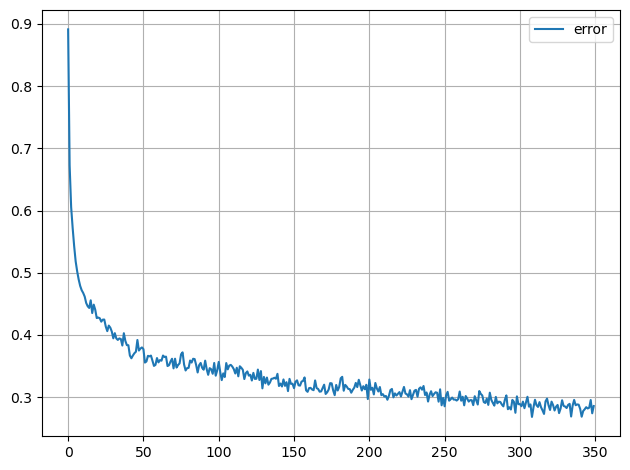

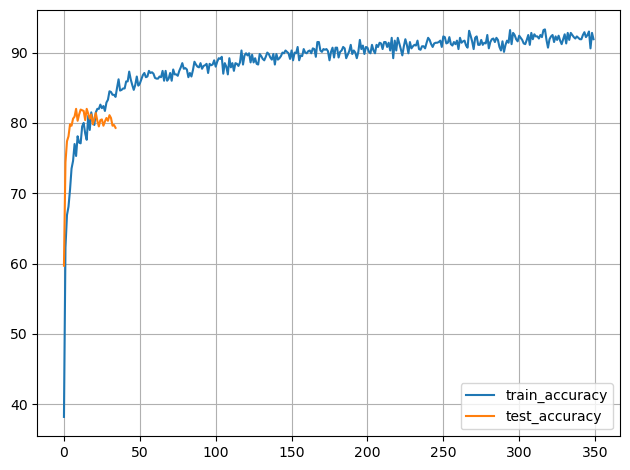

69.85398197174072


In [271]:
start_time = time.time()

## page-172
## DROPOUT

## Overall training Script
##

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train.shape, y_train.shape, x_test.shape, y_test.shape

train_images = x_train[:1000].reshape(-1, 28*28) / 255
train_labels = y_train[:1000]
# train_images.shape, train_labels.shape

train_labels_1hot = np.zeros(shape=(len(train_labels), 10))
for i, x in enumerate(train_labels):
    train_labels_1hot[i, x] = 1

assert len(train_labels) == len(train_labels_1hot)

relu = lambda x: (x>0)*x
relu_to_deriv = lambda x: x >= 0

alpha = 0.005
num_iters = 350
hidden_size = 100
pixels_per_img = 784
num_labels = 10

weights_0_1 = 0.2 * np.random.random(size=(pixels_per_img, hidden_size)) - 0.1
weights_1_2 = 0.2 * np.random.random(size=(hidden_size, num_labels)) - 0.1

error_list = []
train_accuracy_list = []
test_accuracy_list = []

for iter_ in range(num_iters):
    iter_error = 0.0
    iter_correct_count = 0
    for i in range(len(train_images)):
        input_ = train_images[i:i+1]
        label_ = train_labels_1hot[i:i+1]
        
        ## Forward pass
        layer_0 = input_
        
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        ## dropout application the hidden layer
        dropout_mask = np.random.randint(low=0, high=2, size=layer_1.shape)
        layer_1 *= dropout_mask * 2

        layer_2 = np.dot(layer_1, weights_1_2)
        
        ## error/accuracy calculation
        error = np.sum((label_ - layer_2) ** 2)
        iter_error += error
        iter_correct_count += int(np.argmax(layer_2) == np.argmax(label_))
        
        ## backpropagation & updating the weights
        layer_2_delta = label_ - layer_2
        layer_1_delta = np.dot(layer_2_delta, weights_1_2.T) * relu_to_deriv(layer_1)
        layer_1_delta *= dropout_mask
        
        weights_1_2 += alpha * np.dot(layer_1.T, layer_2_delta)
        weights_0_1 += alpha * np.dot(layer_0.T, layer_1_delta)
        
    iter_error /= len(train_images)
    error_list.append(iter_error)
    iter_accuracy = 100 * iter_correct_count / len(train_images)
    train_accuracy_list.append(iter_accuracy)
    
    if iter_ % 10 == 0:
        
        ## test phase
        test_accuracy_count = 0.0

        for i in range(len(test_images)):
            input_ = test_images[i:i+1]
            label_ = test_labels_1hot[i:i+1]

            layer_0 = input_
            layer_1 = relu(np.dot(layer_0, weights_0_1))
            layer_2 = np.dot(layer_1, weights_1_2)

            pred = layer_2
            test_accuracy_count += np.argmax(label_) == np.argmax(pred)

        test_accuracy = 100 * test_accuracy_count / len(test_images)
        test_accuracy_list.append(test_accuracy)
        print(f"| Iter [{iter_:3}] | Train_Error = {iter_error:.10f} | Train_Accuracy = {iter_accuracy:3.2f}% | Test_Accuracy = {test_accuracy:5.2f} %")


        
plt.figure()
plt.plot(list(range(num_iters)), error_list, label="error")
plt.legend(); plt.grid(); plt.tight_layout(); plt.show()
plt.figure()
plt.plot(list(range(num_iters)), train_accuracy_list, label="train_accuracy")
plt.plot(list(range(num_iters//10)), test_accuracy_list, label="test_accuracy")
plt.legend(); plt.grid(); plt.tight_layout(); plt.show()

print(time.time() - start_time)

In [225]:
## test phase

test_accuracy_count = 0.0

for i in range(len(test_images)):
    input_ = test_images[i:i+1]
    label_ = test_labels_1hot[i:i+1]

    layer_0 = input_
    layer_1 = relu(np.dot(layer_0, weights_0_1))
    layer_2 = np.dot(layer_1, weights_1_2)
    
    pred = layer_2
    test_accuracy_count += np.argmax(label_) == np.argmax(pred)

test_accuracy = 100 * test_accuracy_count / len(test_images)
print(f"Test Accuracy = {test_accuracy:5.2f} %")


Test Accuracy = 80.20 %


## Batched Gradient Descent

| Iter [  0] | Train_Error = 0.8849606536 | Train_Accuracy = 40.60% | Test_Accuracy = 60.70 %
| Iter [ 10] | Train_Error = 0.4769103338 | Train_Accuracy = 78.10% | Test_Accuracy = 74.50 %
| Iter [ 20] | Train_Error = 0.4327391967 | Train_Accuracy = 80.70% | Test_Accuracy = 78.50 %
| Iter [ 30] | Train_Error = 0.4177032630 | Train_Accuracy = 83.00% | Test_Accuracy = 80.00 %
| Iter [ 40] | Train_Error = 0.4035515408 | Train_Accuracy = 83.60% | Test_Accuracy = 79.80 %
| Iter [ 50] | Train_Error = 0.3918459087 | Train_Accuracy = 84.40% | Test_Accuracy = 79.50 %
| Iter [ 60] | Train_Error = 0.3867343410 | Train_Accuracy = 84.20% | Test_Accuracy = 80.40 %
| Iter [ 70] | Train_Error = 0.3746240894 | Train_Accuracy = 83.80% | Test_Accuracy = 80.90 %
| Iter [ 80] | Train_Error = 0.3870268799 | Train_Accuracy = 85.00% | Test_Accuracy = 81.40 %
| Iter [ 90] | Train_Error = 0.3879573522 | Train_Accuracy = 84.60% | Test_Accuracy = 78.10 %
| Iter [100] | Train_Error = 0.3842175628 | Train_Accuracy =

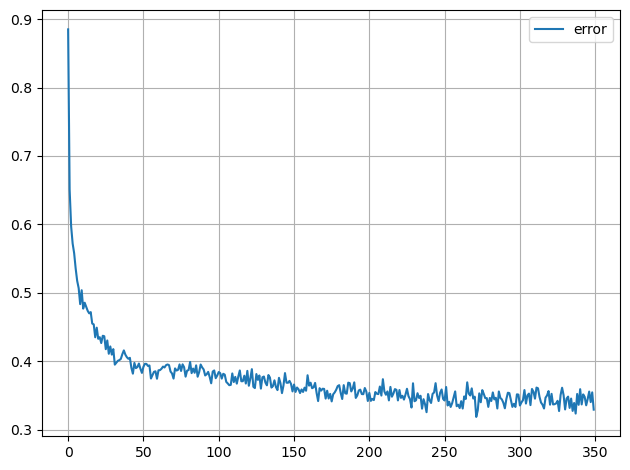

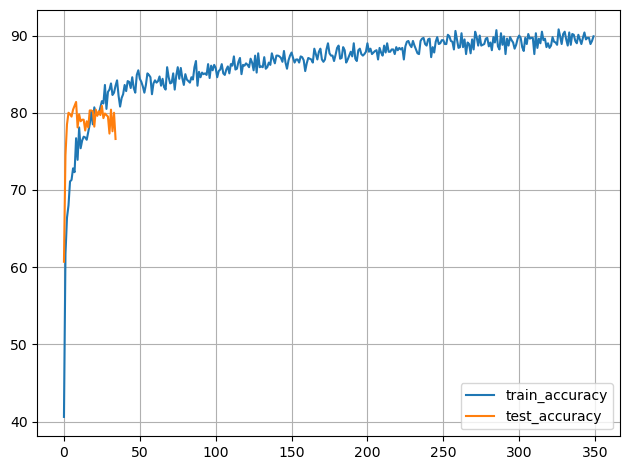

55.42038083076477


In [272]:
start_time = time.time()

## page-172
## DROPOUT

## Overall training Script
##

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train.shape, y_train.shape, x_test.shape, y_test.shape

train_images = x_train[:1000].reshape(-1, 28*28) / 255
train_labels = y_train[:1000]
# train_images.shape, train_labels.shape

train_labels_1hot = np.zeros(shape=(len(train_labels), 10))
for i, x in enumerate(train_labels):
    train_labels_1hot[i, x] = 1

assert len(train_labels) == len(train_labels_1hot)

relu = lambda x: (x>0)*x
relu_to_deriv = lambda x: x >= 0

alpha = 0.005
num_iters = 350
hidden_size = 100
pixels_per_img = 784
num_labels = 10
batch_size = 10

weights_0_1 = 0.2 * np.random.random(size=(pixels_per_img, hidden_size)) - 0.1
weights_1_2 = 0.2 * np.random.random(size=(hidden_size, num_labels)) - 0.1

error_list = []
train_accuracy_list = []
test_accuracy_list = []

for iter_ in range(num_iters):
    iter_error = 0.0
    iter_correct_count = 0
    for i in range(len(train_images) // batch_size):
        batch_start = i * batch_size
        batch_end = (i+1) * batch_size
        input_ = train_images[batch_start:batch_end]
        label_ = train_labels_1hot[batch_start:batch_end]
        
        ## Forward pass
        layer_0 = input_
        
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        ## dropout application the hidden layer
        dropout_mask = np.random.randint(low=0, high=2, size=layer_1.shape)
        layer_1 *= dropout_mask * 2

        layer_2 = np.dot(layer_1, weights_1_2)
        pred = layer_2
        
        ## error/accuracy calculation
        error = np.sum((label_ - pred) ** 2)
        iter_error += error
        
        ## BATCHED backpropagation & updating the weights
        for j in range(batch_size):
            iter_correct_count += int(np.argmax(pred[j:j+1]) == np.argmax(label_[j:j+1]))
            layer_2_delta = (label_ - pred) / batch_size
            layer_1_delta = np.dot(layer_2_delta, weights_1_2.T) * relu_to_deriv(layer_1)
            layer_1_delta *= dropout_mask

            weights_1_2 += alpha * np.dot(layer_1.T, layer_2_delta)
            weights_0_1 += alpha * np.dot(layer_0.T, layer_1_delta)
        
    iter_error /= len(train_images)
    error_list.append(iter_error)
    iter_accuracy = 100 * iter_correct_count / len(train_images)
    train_accuracy_list.append(iter_accuracy)
    
    if iter_ % 10 == 0:
        
        ## test phase
        test_accuracy_count = 0.0

        for i in range(len(test_images)):
            input_ = test_images[i:i+1]
            label_ = test_labels_1hot[i:i+1]

            layer_0 = input_
            layer_1 = relu(np.dot(layer_0, weights_0_1))
            layer_2 = np.dot(layer_1, weights_1_2)

            pred = layer_2
            test_accuracy_count += np.argmax(label_) == np.argmax(pred)

        test_accuracy = 100 * test_accuracy_count / len(test_images)
        test_accuracy_list.append(test_accuracy)
        print(f"| Iter [{iter_:3}] | Train_Error = {iter_error:.10f} | Train_Accuracy = {iter_accuracy:3.2f}% | Test_Accuracy = {test_accuracy:5.2f} %")


        
plt.figure()
plt.plot(list(range(num_iters)), error_list, label="error")
plt.legend(); plt.grid(); plt.tight_layout(); plt.show()
plt.figure()
plt.plot(list(range(num_iters)), train_accuracy_list, label="train_accuracy")
plt.plot(list(range(num_iters//10)), test_accuracy_list, label="test_accuracy")
plt.legend(); plt.grid(); plt.tight_layout(); plt.show()

print(time.time() - start_time)